In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from scipy.stats import norm

In [16]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

## Implement pricing functions in Python

In [17]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    t=0
    # --------- Insert your code here --------- #
    # Black Scholes formula
    d1 = 1/(sigma * np.sqrt(T-t)) * (np.log(S0/K) + (r + sigma**2/2) * (T-t))
    d2 = d1 - sigma * np.sqrt(T-t)
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r * (T-t))
    p = norm.cdf(-d2) * K * np.exp(-r * (T-t)) - norm.cdf(-d1) * S0
    return c, p

In [18]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps+1, numPaths))
    paths[0] = [S0]*numPaths
    dT = T/numSteps
    
    for i in range(numPaths):
        for j in range(numSteps):
            paths[j+1,i] = paths[j,i] * np.exp((mu - 0.5 * sigma**2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
#     print(paths)
#     print('----')
    callpayoffT = np.maximum(paths[numSteps:] - K, 0)
    putpayoffT = np.maximum(K - paths[numSteps:], 0)

    c = np.mean(callpayoffT) * np.exp(-r * T)
    p = np.mean(putpayoffT) * np.exp(-r * T)
    
    return c, p, paths

In [19]:
# numSteps = 10;
# numPaths = 15;
# MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

In [20]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
    paths = np.zeros((numSteps+1, numPaths))
    paths[0] = [S0]*numPaths
    dT = T/numSteps
    
    for i in range(numPaths):
        for j in range(numSteps):
            paths[j+1,i] = paths[j,i] * np.exp((mu - 0.5 * sigma**2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1))

    callpayoffT = [np.maximum(paths[numSteps,p] - K, 0) if np.sum(paths[:,p] >= Sb)>0 else 0 for p in range(numPaths)]
    putpayoffT = [np.maximum(K - paths[numSteps,p], 0) if np.sum(paths[:,p] >= Sb)>0 else 0 for p in range(numPaths)]

    c = np.mean(callpayoffT) * np.exp(-r * T)
    p = np.mean(putpayoffT) * np.exp(-r * T)

    return c, p

## Analyze your results

In [26]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;
# numPaths = 1000
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multi_step = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

# Plot results
# --------- Insert your code here --------- #

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.029839492795398
One-step MC price of an European put option is 7.898986542538186
Multi-step MC price of an European call option is 8.020807058368954
Multi-step MC price of an European put option is 7.902832020653827
One-step MC price of an Barrier call option is 7.832572944630245
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.9662941967114165
Multi-step MC price of an Barrier put option is 1.191068631121969


In [39]:
paths_1_step[:,0:-1]

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [107.47854908, 129.57576618, 132.15112533, ...,  71.30168129,
         75.16030003, 172.41416197]])

### Plot one chart in Python that illustrates your Monte Carlo pricing procedure in the best way.

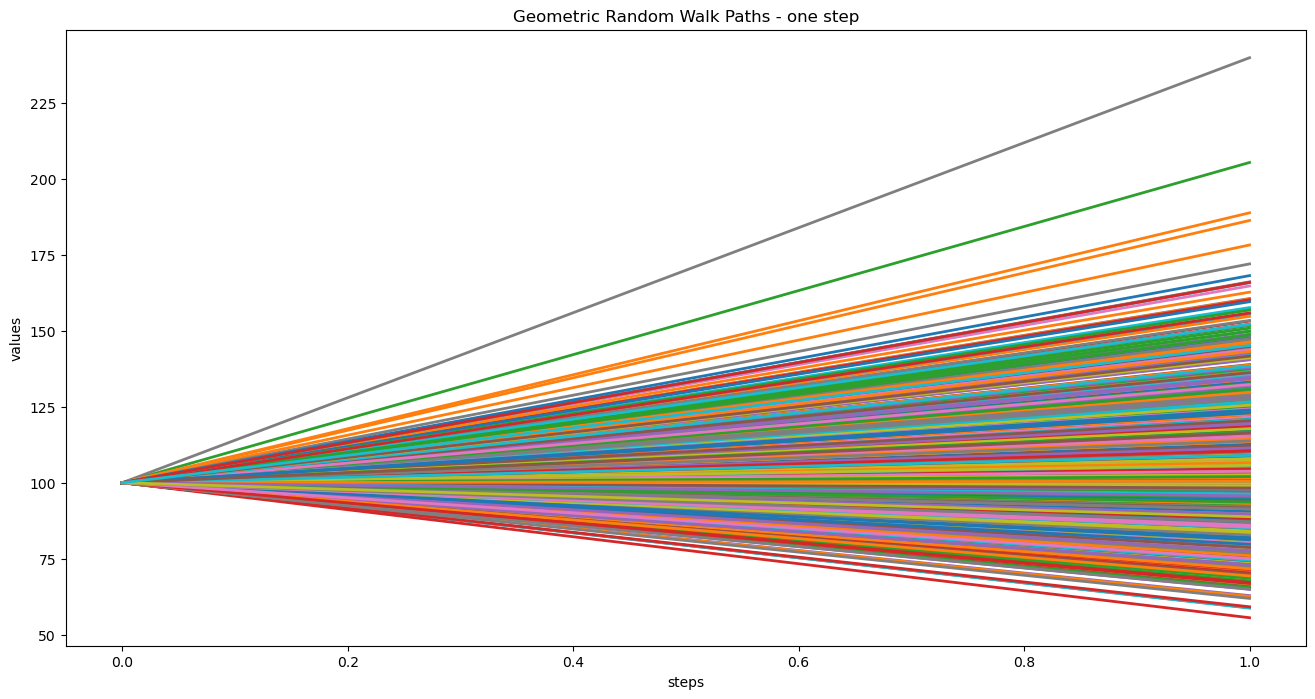

In [32]:
plt.figure(figsize = (16,8))
[plt.plot(paths_1_step[:,i], linewidth=2) for i in range(1000)]
plt.title('Geometric Random Walk Paths - one step')
plt.xlabel('steps')
plt.ylabel('values')
plt.show()

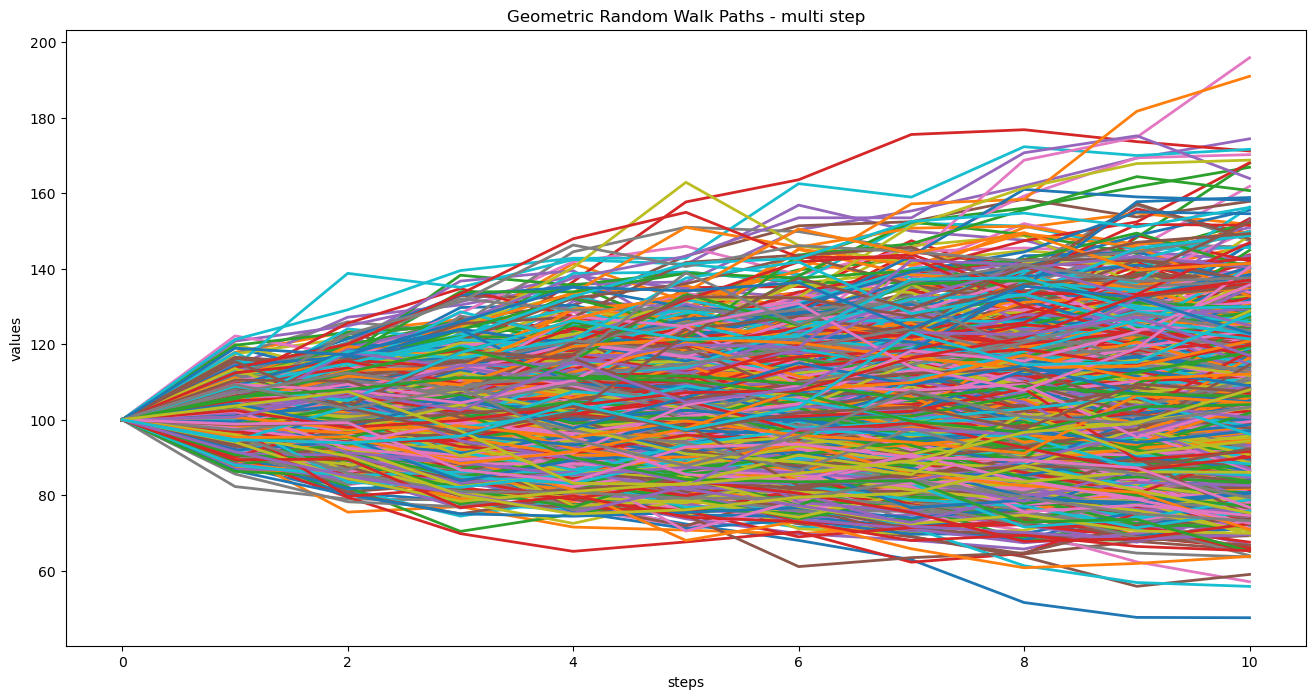

In [31]:
plt.figure(figsize = (16,8))
[plt.plot(paths_multi_step[:,i], linewidth=2) for i in range(1000)]
plt.title('Geometric Random Walk Paths - multi step')
plt.xlabel('steps')
plt.ylabel('values')
plt.show()

### Volatility increased by 10%

In [12]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

One-step MC price of an Barrier call option is 8.625989527814786
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.782381831166484
Multi-step MC price of an Barrier put option is 1.5021331032416088


### Volatility decreased by 10%

In [14]:
numSteps = 10;
numPaths = 1000000;

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)

print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

One-step MC price of an Barrier call option is 6.987570682042987
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.128070943273601
Multi-step MC price of an Barrier put option is 0.9147838246961735


## Discuss possible strategies to obtain the same prices from two procedures:

In [25]:
# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

nums = [10,15,20]; # number of steps
nump = [10000,30000,50000,70000,100000,300000,500000]; # number of paths
error = 10 # error is the sum of difference in absolute put and call prices
# optimum steps paths call price put price
opt_s = 0
opt_p = 0
call = 0
put = 0

for s in nums:
    for p in nump:
        # Implement your multi-step Monte Carlo pricing procedure for European option
        callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multi_step = MC_european_price(S0, K, T, r, mu, sigma, s, p)
        if abs(call_BS_European_Price-callMC_European_Price_multi_step) <= 0.01 and abs(putBS_European_Price-putMC_European_Price_multi_step) <= 0.01:
            # if call and put price is the same as Black-Scholes up to cent
            # error is the sum of difference in absolute put and call prices
            e = abs(call_BS_European_Price-callMC_European_Price_multi_step) + abs(putBS_European_Price-putMC_European_Price_multi_step)
            print(e)
            if e < error: # error smaller
                error = e
                opt_s = s
                opt_p = p
                call = callMC_European_Price_multi_step
                put = putMC_European_Price_multi_step
            


0.006612384865738008
0.014248060880625246
0.007473146540275977


In [26]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('Closest Monte Carlo is given by:',opt_s,'steps,',opt_p,'paths, with absolute error: ',error)
print('Multi-step MC price of an European call option is ' + str(call)) 
print('Multi-step MC price of an European put option is ' + str(put)) 

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
Closest Monte Carlo is given by: 10 steps, 500000 paths, with absolute error:  0.006612384865738008
Multi-step MC price of an European call option is 8.017441041137618
Multi-step MC price of an European put option is 7.897740616857966
